In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

from ppo_control import run_sim
import F16model.utils.control_metrics as utils_metrics
from F16model.utils.calc import normalize_value
import F16model.utils.control as utils_control
import F16model.data.plane as plane
from F16model.env import F16

model_name = r"D:\Documents\Шарага\diser\model\F16-model-python\runs\optuna_omega_z_control\F16__1__1710300960__cd61"
# model_name = r"D:\Documents\Шарага\diser\model\F16-model-python\runs\without_gsde\F16__1__1711285137__e275"

## Run simulation

In [6]:
init_state = np.array([0, 10000, 0, 0, 175, 0])
init_control = np.array([0, 0])
ENV_CONFIG = {
    "dt": 0.01,
    "tn": 10,
    "debug_state": False,
    "determenistic_ref": True,
    "scenario": "cos",
}
ENV_CONFIG["init_state"] = init_state
ENV_CONFIG["init_control"] = init_control

states, inside_state, actions, ref_signal, r, t = run_sim(ENV_CONFIG, model_name)

Run with seed = 880
Start state: Ox = 0 m; Oy = 10000 m; wz = 0.0 deg/s; V = 175 m/s; theta = 0.0 deg; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %


In [ ]:
init_state = np.array([0, 2500, 0, 0, 170, 0])
init_control = np.array([0, 0])
ENV_CONFIG = {
    "dt": 0.01,
    "tn": 10,
    "debug_state": False,
    "determenistic_ref": True,
    "scenario": "combo",
    "noise": 0.003,
}
ENV_CONFIG["init_state"] = init_state
ENV_CONFIG["init_control"] = init_control

states, inside_state, actions, ref_signal, r, t = run_sim(ENV_CONFIG, model_name)

### Plot Agent Run

In [7]:
# Data manipulation
omega_z = np.degrees([i[1] for i in states])
omega_z_real = np.degrees([i.wz for i in inside_state])
omega_z_ref = np.degrees(ref_signal)

Oy = np.array([i[0] for i in states])
Oy_real = np.array([i.Oy for i in inside_state])

action = np.degrees([i.stab for i in inside_state])
action_real = np.degrees([i for i in actions])

nmae_value = utils_metrics.nMAE(omega_z_ref, omega_z_real)
print(f"NMAE = {nmae_value:.3f}")
print(sum(r))

RUN_TIME = datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plot_name = RUN_TIME
img_fmt = "svg"

NMAE = 0.288
421.7751873320856


In [ ]:
print(action_real)

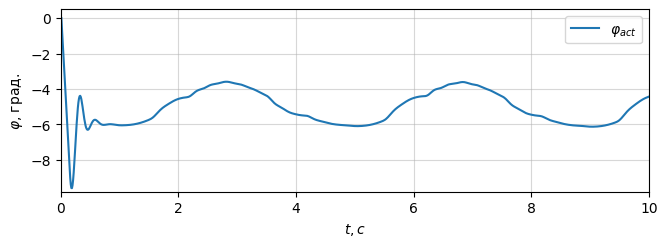

In [5]:
# Action
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(t, action, label=r"$\varphi_{act}$")
# plt.plot(t, action_ref, "--", label=r"$\varphi_{ref}$")
plt.ylabel(r"$\varphi$, град.")
plt.xlabel(r"$t, с$")
plt.legend()

plt.xlim(0, round(t[-1]))
plt.ylim(min(action)-0.2, max(action)+0.5)

ax.grid(which='minor', alpha=0.2, linestyle="--")
ax.grid(which='major', alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_action.{img_fmt}")

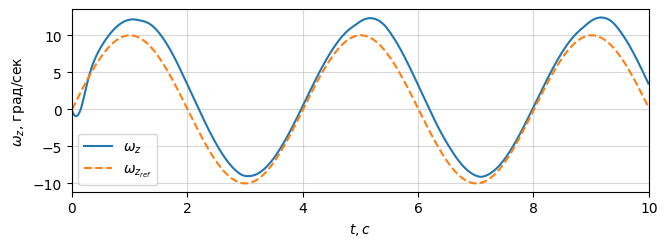

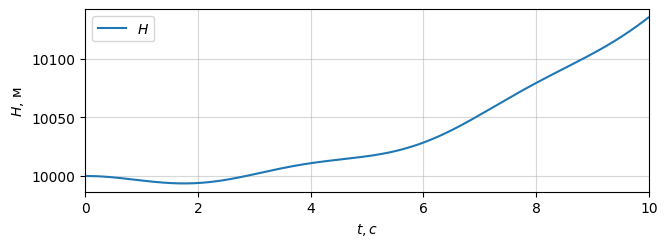

In [10]:
# State Wz
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plt.plot(t, omega_z, label=r"$\omega_{z}^{\bar{s}}$", alpha=0.5)
plt.plot(t, omega_z_real, label=r"$\omega_{z}$")
plt.plot(t, omega_z_ref, "--", label=r"$\omega_{{z}_{ref}}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
plt.legend()

ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_omega_z.{img_fmt}")

# State Oy
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, Oy, label=r"$H$")
# plt.plot(t, Oy_real, label=r"$H_{act}$")
plt.ylabel(r"$H$, м")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
plt.legend()

ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_oy.{img_fmt}")


In [ ]:
print(r)
# Reward 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, r)
plt.ylabel(r"Награда")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))

ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_reward.{img_fmt}")

In [ ]:
# noise check
# State
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, omega_z_real - omega_z, label=r"Шум")
# plt.plot(t, omega_z_ref, "--", label=r"$\omega_{{z}_{ref}}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
plt.legend()

ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)

plt.savefig(f"./logs/{nmae_value:.3f}_noise_value.{img_fmt}")

In [ ]:
# Командный сигнал
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, omega_z_ref, "--", label=r"$\omega_{{z}_{ref}}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
# plt.legend()

# ax.set_xticks(x_major_ticks)
# ax.set_xticks(x_minor_ticks, minor=True)
# ax.set_yticks(y_major_ticks)
# ax.set_yticks(y_minor_ticks, minor=True)
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/reference_signal.{img_fmt}")

## Run model w/o controller

In [ ]:
ENV_CONFIG = {
    "dt": 0.01,
    "tn": 10,
    "debug_state": False,
    "determenistic_ref": True,
    "scenario": "pure_step",
}
ENV_CONFIG["init_state"] = np.array([0, 2500.0, 0, np.radians(3.4334), 175, np.radians(3.4334), 0])
ENV_CONFIG["init_control"] = np.array([np.radians(-4.4712), 0.2884])
env = F16(ENV_CONFIG)
stab_ref = utils_control.step_function(
    0, 
    ENV_CONFIG["dt"], 
    ENV_CONFIG["tn"], 
    2, 
    np.radians(-10+4.4712), 
    bias=np.radians(-4.4712)
)

actions = []
states = []
rewards = []
times = []
states_long = []
for i, stab in enumerate(stab_ref):
    action = normalize_value(
        np.array([stab]), -plane.maxabsstab, plane.maxabsstab
    )  # radians -> normalized action
    state, reward, done, _, info = env.step(
        action
    )  # plz put action as normalized value
    states.append(F16.denormalize(state))
    rewards.append(reward)
    actions.append(F16.rescale_action(action))
    times.append(info["clock"])
    states_long.append(info["state"])
    if done:
        states = states[:i]
        actions = actions[:i]
        times = times[:i]
        states_long = states_long[:i]
        rewards = rewards[:i]
        break


### Plot

In [ ]:
# Data manipulation
omega_z = np.degrees([i[1] for i in states])
action_ref = np.degrees([i for i in actions])
action = np.degrees([i.stab for i in states_long])
alpha = np.degrees([i.alpha for i in states_long])
Pa = [i.Pa for i in states_long]

# nmae_value = utils_metrics.nMAE(ref_signal, [i[1] for i in states])
# print(f"NMAE = {nmae_value:.3f}")
total_reward = sum(rewards)
text_state = "".join([f"{i:.0f}_" for i in ENV_CONFIG["init_state"]])
print(total_reward)

RUN_TIME = datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plot_name = RUN_TIME
img_fmt = "svg"

In [ ]:
# Action
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(times, action, label=r"$\varphi_{act}$")
plt.plot(times, action_ref, "--", label=r"$\varphi_{ref}$")
plt.ylabel(r"$\varphi$, град.")
plt.xlabel(r"$t, с$")
plt.legend()
plt.xlim(0, round(times[-1]))
plt.ylim(min(action)-0.2, max(action)+0.2)

ax.grid(which='minor', alpha=0.2, linestyle="--")
ax.grid(which='major', alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{text_state}only_ac_action_{total_reward:.2f}.{img_fmt}")

In [ ]:
# State omega_z
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(times, omega_z, label=r"$\omega_{z}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(times[-1]))
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{text_state}only_ac_omega_z_{total_reward:.2f}.{img_fmt}")

# State alpha
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(times, alpha)
plt.ylabel(r"$\alpha$, град")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(times[-1]))
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{text_state}only_ac_alpha_{total_reward:.2f}.{img_fmt}")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(times, Pa, label=r"Pa")
plt.ylabel(r"Thrust")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(times[-1]))
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
# plt.savefig(f"./logs/{text_state}only_ac_omega_z_{total_reward:.2f}.{img_fmt}")
plt.show()

## Utilites

In [ ]:
# Plotting reward function
step = 0.1
e = np.arange(-15, 15 + step, step)
k = 1
asymptotic_error = np.clip(
    1 - ((np.abs(e) / k) / (1 + (np.abs(e) / k))), a_min=0, a_max=1
)
# linear_error = np.clip(1 - (1 / k) * e**2, a_min=0, a_max=1)
reward = asymptotic_error 

x_major_ticks = np.arange(-15, 15+1, 1)
y_major_ticks = np.arange(0, 1.2, 0.1)
x_minor_ticks = np.arange(-15, 15+0.5, 0.5)
y_minor_ticks = np.arange(0, 1.15, 0.05)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(e, reward, label=r"$r_t$")
plt.xlabel(r"$\omega_{z_{err}}$, град/с")
plt.ylabel(r"Величина награды")
plt.legend()
plt.grid()
plt.gcf().set_size_inches(6.9, 3)
ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)
plt.xlim(-7, 7)
plt.ylim(0, 1.05)
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/reward_signal.{img_fmt}")